In [1]:
import pandas as pd 
df= pd.read_csv("cleaned_dataset.csv")

#print(df.info())


DESCRIPTIVE ANALYSIS

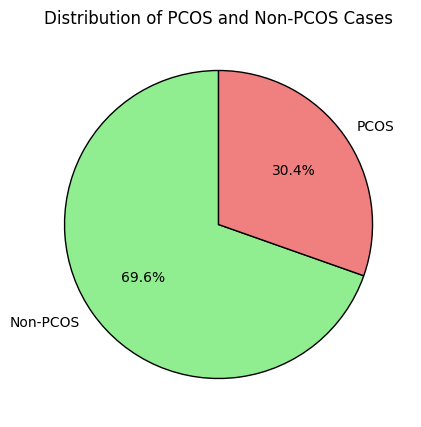

In [2]:

import matplotlib.pyplot as plt
pcos_counts = df['PCOS (Y/N)'].value_counts()
labels = ['Non-PCOS', 'PCOS']
sizes = [pcos_counts[0], pcos_counts[1]]
colors = ['lightgreen', 'lightcoral'] 
plt.figure(figsize=(7,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of PCOS and Non-PCOS Cases')
plt.show()


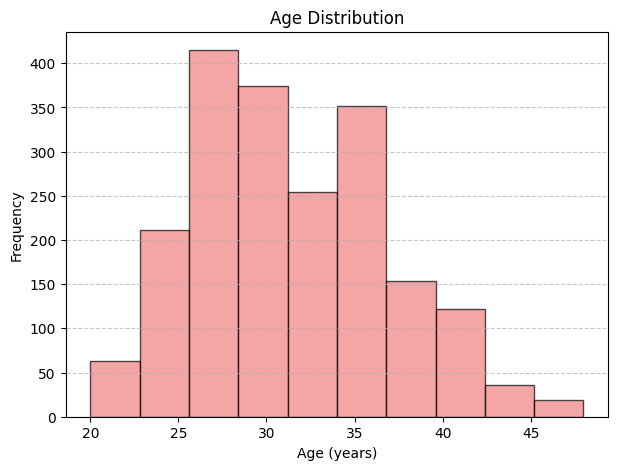

In [3]:
import matplotlib.pyplot as plt

# Plot the age distribution
plt.figure(figsize=(7,5))
plt.hist(df[' Age (yrs)'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


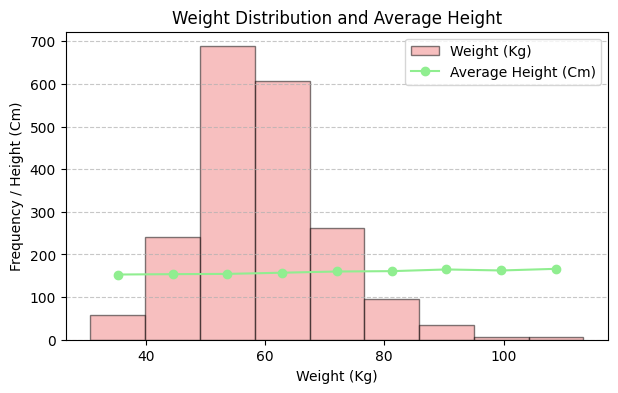

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
weights = df['Weight (Kg)']
heights = df['Height(Cm) ']

# Create bins for the histogram
bins = np.linspace(weights.min(), weights.max(), 10)

# Plot the histogram for weight
plt.figure(figsize=(7,4))
plt.hist(weights, bins=bins, alpha=0.5, label='Weight (Kg)', color='lightcoral', edgecolor='black')

# Calculate mean height for each bin and plot the line
bin_means = [heights[(weights >= bins[i]) & (weights < bins[i + 1])].mean() for i in range(len(bins) - 1)]
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, bin_means, color='lightgreen', marker='o', label='Average Height (Cm)')

# Add labels, title, and legend
plt.title('Weight Distribution and Average Height')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency / Height (Cm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


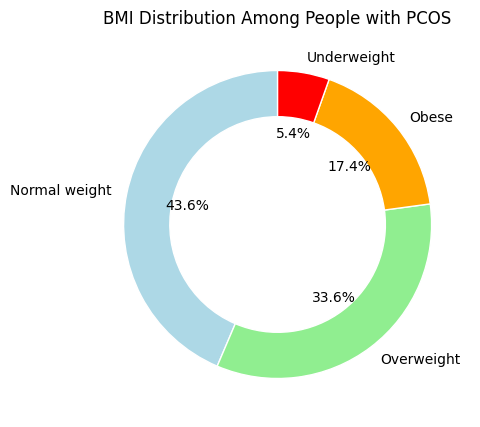

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate BMI
df['BMI'] = df['Weight (Kg)'] / (df['Height(Cm) '] / 100) ** 2

# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

# Filter for people with PCOS
pcos_data = df[df['PCOS (Y/N)'] == 1]

# Count BMI categories for people with PCOS
bmi_counts = pcos_data['BMI Category'].value_counts()

# Create a donut chart
plt.figure(figsize=(7,5))
colors = ['lightblue', 'lightgreen', 'orange', 'red']
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Add title
plt.title('BMI Distribution Among People with PCOS')
plt.show()


STATISTICAL ANALYSIS 

In [7]:
#chi sqaure test on all the symptoms of it 
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform Chi-Square Test
def perform_chi_square(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test: {col1} vs. {col2}")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)
    if p < 0.05:
        print("Result: Significant association between the variables.")
    else:
        print("Result: No significant association between the variables.")


# Perform Chi-Square Test for specified pairs
perform_chi_square(df, 'PCOS (Y/N)', 'Weight gain(Y/N)')
perform_chi_square(df, 'PCOS (Y/N)', 'hair growth(Y/N)')
perform_chi_square(df, 'PCOS (Y/N)', 'Skin darkening (Y/N)')
perform_chi_square(df, 'PCOS (Y/N)', 'Hair loss(Y/N)')
perform_chi_square(df, 'PCOS (Y/N)', 'Pimples(Y/N)')



Chi-Square Test: PCOS (Y/N) vs. Weight gain(Y/N)
Chi-Square Statistic: 370.16820133094734
P-value: 1.7201704570557486e-82
Degrees of Freedom: 1
Expected Frequencies:
 [[862.344 529.656]
 [376.656 231.344]]
Result: Significant association between the variables.

Chi-Square Test: PCOS (Y/N) vs. hair growth(Y/N)
Chi-Square Statistic: 463.3390230845015
P-value: 9.021272963272166e-103
Degrees of Freedom: 1
Expected Frequencies:
 [[1009.896  382.104]
 [ 441.104  166.896]]
Result: Significant association between the variables.

Chi-Square Test: PCOS (Y/N) vs. Skin darkening (Y/N)
Chi-Square Statistic: 432.7527416779711
P-value: 4.090330944540693e-96
Degrees of Freedom: 1
Expected Frequencies:
 [[988.32 403.68]
 [431.68 176.32]]
Result: Significant association between the variables.

Chi-Square Test: PCOS (Y/N) vs. Hair loss(Y/N)
Chi-Square Statistic: 65.7255730424206
P-value: 5.182897357394687e-16
Degrees of Freedom: 1
Expected Frequencies:
 [[774.648 617.352]
 [338.352 269.648]]
Result: Sig

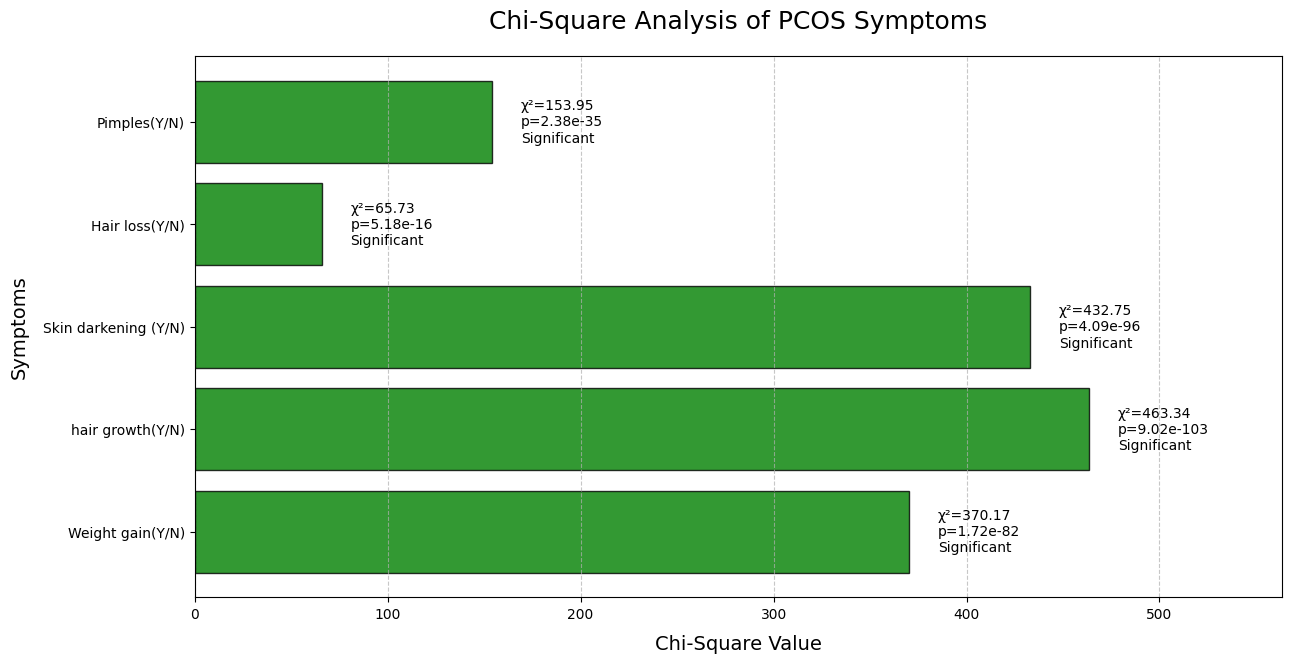

In [15]:
import matplotlib.pyplot as plt

# Results from Chi-Square Tests
results = [
    ("Weight gain(Y/N)", 370.168, 1.72e-82, "Significant"),
    ("hair growth(Y/N)", 463.339, 9.02e-103, "Significant"),
    ("Skin darkening (Y/N)", 432.753, 4.09e-96, "Significant"),
    ("Hair loss(Y/N)", 65.726, 5.18e-16, "Significant"),
    ("Pimples(Y/N)", 153.950, 2.38e-35, "Significant")
]

# Extract data for plotting
symptoms = [row[0] for row in results]
chi_square_values = [row[1] for row in results]
p_values = [row[2] for row in results]
significance = [row[3] for row in results]

# Create the bar chart with annotations
plt.figure(figsize=(14,7))  # Increased figure size
colors = ['green' if sig == "Significant" else 'red' for sig in significance]
plt.barh(symptoms, chi_square_values, color=colors, edgecolor='black', alpha=0.8)

# Add annotations
for index, (chi2, p, sig) in enumerate(zip(chi_square_values, p_values, significance)):
    plt.text(chi2 + 15, index, f"χ²={chi2:.2f}\np={p:.2e}\n{sig}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Chi-Square Analysis of PCOS Symptoms', fontsize=18, pad=20)
plt.xlabel('Chi-Square Value', fontsize=14, labelpad=10)
plt.ylabel('Symptoms', fontsize=14, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)  # Adjust spacing
plt.xlim(0, max(chi_square_values) + 100)  # Add space for text annotations

# Show the plot
plt.show()
